# Exploratory Data Analysis and Groupby using Pandas

## Learning Goals 

- Understand the relationship between path and file location 
- Distinguish between relative and absolute paths 
- Apply the `.groupby()` method to aggregate data. 


In [1]:
# we import the pandas library 
import pandas as pd

We continue to work with the Palmer Penguin dataset from last week, which was shared in the folder for week 4: `W4_Pandas_And_Environmental_Data`. 

## Using paths to specify file locations

This is a good time to think a bit more about data and code organization on your computer. For the program to be able to read the dataset, it needs to know where to find it. Computers do this through what is called absolute and relative paths. 

- The ***absolute path*** is the location of the file within your computer's file system. In my case, a Windows PC, the file location of the dataset is: `D:\GitHub\ISAT_420_S26_Shared\W4_Pandas_And_Environmental_Data\Data\palmer_penguin_data.csv`. Using absolute paths to find files can be problematic, because the absolute location of the file will be different on everybody's machines. 
- A ***relative path*** is a way for specifying file location in relationship to each other. Our shared repository is organized using hierarchical folders. As a convention **python** code is executed in the directory that it is located. If we follow the directory outline below, we can find the relative path of the `palmer_penguin_data.csv` in relation to this jupyter notebook `w5_pandas_groupby.ipynb`. To find the file, we would need to go back to the  `ISAT_420_S26_Shared` directory and then travel down into the `Data` directory inside `W4_Pandas_And_Environmental_Data`.

  ```
  ISAT_420_S26_Shared|
                     |-W4_Pandas_And_Environmental_Data|
                     |                                 |-Code
                     |                                 |-Data|
                     |                                       |-palmer_penguin_data.csv
                     |-W5_Pandas_Groupby_And_Timeseries|
                                                       |-Code|
                                                       |     |-w5_pandas_groupby.ipynb
                                                       |
                                                       |-Data

  ```   

  As a relative path, this can be expressed as: `../../W4_Pandas_And_Environmental_Data/Data/palmer_penguin_data.csv`, where the `../` means move one directory up.
  
  We can now read in our dataset just like last week. 

In [2]:
df_penguins = pd.read_csv('../../W4_Pandas_And_Environmental_Data/Data/palmer_penguin_data.csv',
                          sep = ',',
                          na_values='NA',
                          skiprows= 1,
                          index_col=0   # Use the first column as the index of the DataFrame
                          )
df_penguins

df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Exploratory Analysis

In order to be able to ask any science questions, we need to have a basic understanding of the dataset. We have already seen that we can get basic statistics with the `.decribe()` method. 

In [3]:
df_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### Exploratory plots

Making plots is another good way of understanding our data. **Pandas** allows us to make plots easily. For example, we can use the build-in [`.plot()`-method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to create many plots including: barplots, scatter plots, histograms, ...

Let's create histograms for `bill_depth_mm` and `body_mass_g`. 

This can be done with a single line of code: 

<Axes: title={'center': 'Histogram of Bill Depth'}, xlabel='Bill Depth (mm)', ylabel='Frequency'>

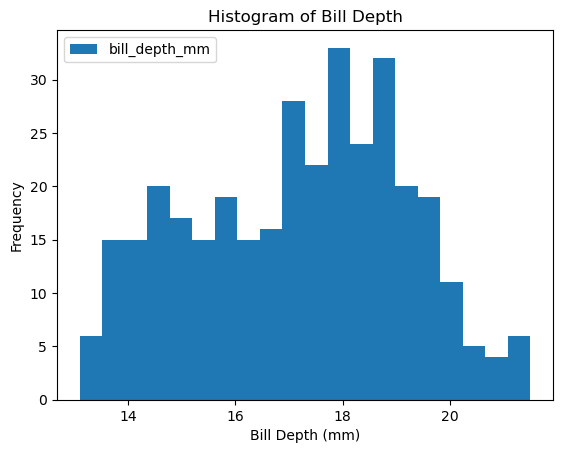

In [4]:
df_penguins.plot(kind='hist', column = 'bill_depth_mm', bins=20, xlabel='Bill Depth (mm)', title='Histogram of Bill Depth')

<Axes: title={'center': 'Histogram of Body Mass'}, xlabel='Body Mass (g)', ylabel='Frequency'>

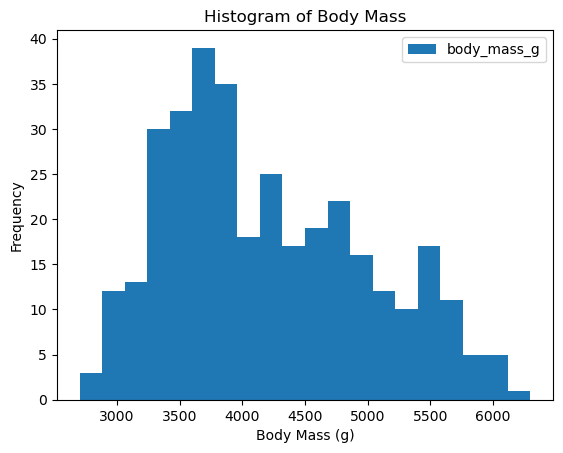

In [5]:
df_penguins.plot(kind='hist', column = 'body_mass_g', bins=20, xlabel = 'Body Mass (g)', title='Histogram of Body Mass')

The data looks a bit wonky, there is more than a single peak for *body mass* and *bill depth*. 

Sometimes it helps to look at more than one variable at the same time. So let's create a scatter plot:

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

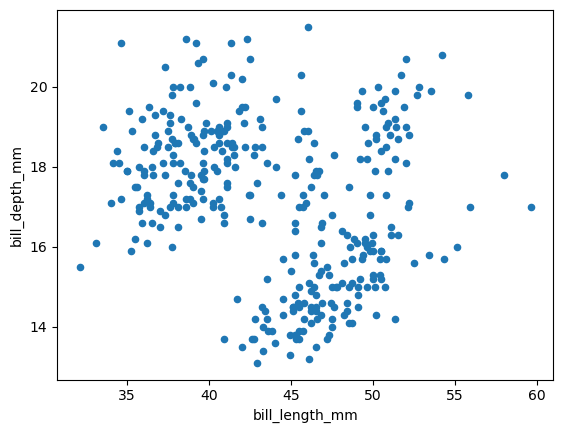

In [6]:
df_penguins.plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm')

**Based on this scatter plot, do you have a hypothesis on what might be causing this distribution?**

## Pandas: Groupby

`groupby` is an amazingly powerful function in pandas. But it is also complicated to use and understand. The point of this lesson is to make you feel confident in using `groupby`. 


1. **Split**: Partition the data into different groups based on some criterion.
2. **Apply**: Do some calculation within each group.
    - In our case this might be an *aggregation* step like calculating the mean or getting a count for each group.
3. **Combine**: Put the results back together into a single object.

This is visualized in the diagram below: 

![Visual representation of the groupy](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)

How would something like this look for our example? 

In **pandas** we like to write one-liners that string these steps together. 

Let's look at one example: 

In [7]:
df_penguins.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,,
Adelie,152,151,151,151,151,146,152
Chinstrap,68,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119,124


Let's discuss what this means. We can see that there are 152 _Adelie_ penguins that have a record within the island columns, compared to 68 _Chinstrap_ and 124 _Gentoo_ penguins. We can also see that the counts are not the same in all columns. 

**Why is that?**

How about we now see how the bodies of these penguins compare using groupby and mean:

*Note: Since we cannot calculate the mean for non-numeric columns like `sex`, we select only columns with numbers for the aggregation step.* 

In [8]:
df_penguins.groupby('species')[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


We can even directly make a plot from the _groupby_ results.

<Axes: xlabel='species'>

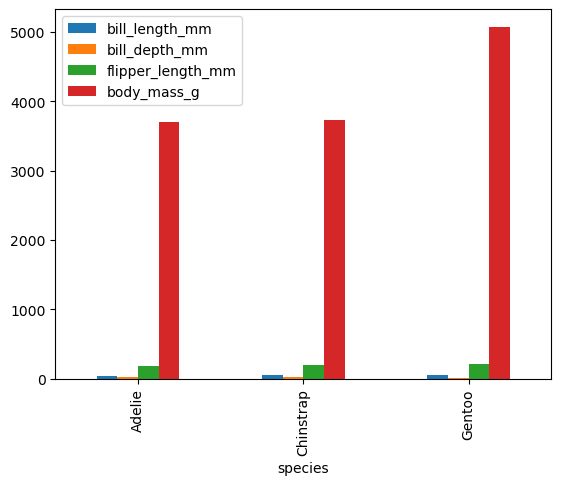

In [9]:
df_penguins.groupby('species')[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean().plot(kind = 'bar')


We can now go back to one of our first plots and separate the different species by color. We have not discussed each of these commands, but in short. I am making 3 plots which are plotted into the same figure as defined by the axes `ax`. 

This is difficult to do when only using **pandas**. However, **pandas** is using the `matplotlib` graphing library in the background. Using `matplotlib` directly, we can make this plot.


Text(0.5, 1.0, 'hello')

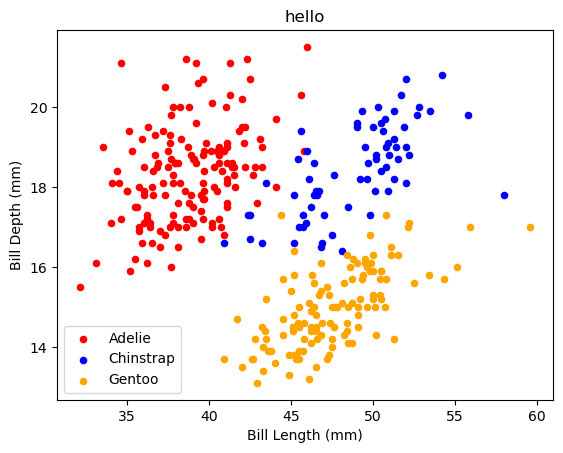

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_penguins.loc[df_penguins['species'] == 'Adelie'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color = 'red', ax=ax, label='Adelie')
df_penguins.loc[df_penguins['species'] == 'Chinstrap'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color = 'blue', ax=ax, label='Chinstrap')
df_penguins.loc[df_penguins['species'] == 'Gentoo'].plot(kind='scatter', x='bill_length_mm', y='bill_depth_mm', color = 'orange', ax=ax, label='Gentoo')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_title('hello')

## Conclusion

- We now have a better understanding of the dataset
- Simple plotting functions and the `.groupby` method have helped us make sense of how the data looks like. 
- Once we have an understanding of what our data means, we can start thinking about what questions we can use it to answer.
